# DS4A / COLOMBIA 4.0 

# Tema: Comportamiento del consumidor en el comercio electrónico

Data science for the digital future

- Ximena Rios Cotazo

- Ramon Manuel Sandoval 



## E-Commerce 

El comercio electrónico se define como la actividad de compra o venta de bienes a través de medios electrónicos en línea o en la red mundial. La llegada de Internet permitió un crecimiento sin precedentes de los canales de comunicación en todo el mundo. Como resultado, surgieron industrias y se desarrollaron mercados para compras en línea para satisfacer la demanda de productos que no estaban disponibles en el país.

El comercio electrónico ha dado lugar a un cambio en las estrategias de marketing y publicidad, lo que permite a las empresas llegar a los usuarios a través de múltiples canales (es decir, aplicaciones móviles) y expandir su alcance con un esfuerzo mínimo. En consecuencia, esto también ha generado cantidades sustanciales de datos del consumidor, que a través de un análisis matemático cuidadoso ofrece una capacidad poderosa pero perspicaz para reducir los comportamientos de gasto del consumidor, que a su vez impulsa sus ventas.

Además, la publicidad programática adaptada específicamente y la extracción de datos del consumidor ha provocado una nueva ola de empresas e industrias. El crecimiento exponencial de los datos generados a través de la "experiencia de compra en línea" permite a las empresas aprender y extraer información fundamental de las transacciones para desarrollar una visión de los segmentos de clientes, los sesgos, los precios y los hábitos de gasto.

## Planteamiento del problema

¿Qué aspectos del comportamiento en línea de los consumidores son útiles para que las empresas comprendan mejor a sus clientes y predigan las tendencias del consumidor, los hábitos de gasto y las variables relacionadas con las compras?

## Objetivos

- Comprensión y limpieza de datos
- Análisis y modelado
- Modelos de predicción
- Visualizacion de la información

## Requerimientos

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics


# DATASET:  Conjunto de datos públicos brasileños de comercio electrónico de Olist

Este es un conjunto de datos públicos de comercio electrónico brasileño de pedidos realizados en Olist Store, tomado de [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_geolocation_dataset.csv ). El conjunto de datos tiene información de 100k pedidos realizados entre el 2016 y 2018 en múltiples mercados en Brasil. Sus características permiten ver un pedido desde múltiples dimensiones: desde el estado del pedido, el precio, el pago y el desempeño del flete hasta la ubicación del cliente, los atributos del producto y finalmente las reseñas escritas por los clientes. También publicamos un conjunto de datos de geolocalización que relaciona los códigos postales brasileños con las coordenadas lat / lng.

**Contexto**
Este conjunto de datos fue proporcionado generosamente por Olist, la tienda por departamentos más grande de los mercados brasileños. Olist conecta pequeñas empresas de todo Brasil con canales sin problemas y con un solo contrato. Estos comerciantes pueden vender sus productos a través de Olist Store y enviarlos directamente a los clientes mediante los socios logísticos de Olist. 

Después de que un cliente compra el producto en Olist Store, un vendedor recibe una notificación para cumplir con ese pedido. Una vez que el cliente recibe el producto, o se vence la fecha estimada de entrega, el cliente recibe una encuesta de satisfacción por correo electrónico donde puede dar una nota por la experiencia de compra y escribir algunos comentarios.

**Atención**
Un pedido puede tener varios artículos.
Cada artículo puede ser realizado por un vendedor distinto.
Todo el texto que identifica tiendas y socios fue reemplazado por los nombres de las grandes casas. 

**Esquema de datos**
Para una mejor comprensión y organización, los conjuntos de datos proporcionados se distribuyen en nueve conjuntos primarios los cuales se cargan a continuacion: 

In [8]:
#customer = pd.read_csv('Data/olist_customers_dataset.csv', delimiter=',') 
#geolocation=pd.read_csv('Data/olist_geolocation_dataset.csv', delimiter=',') 
#order_items=pd.read_csv('Data/olist_order_items_dataset.csv', delimiter=',') 
#order_payments=pd.read_csv('Data/olist_order_payments_dataset.csv', delimiter=',') 
#order_reviews=pd.read_csv('Data/olist_order_reviews_dataset.csv', delimiter=',') 
#orders=pd.read_csv('Data/olist_orders_dataset.csv', delimiter=',') 
#products=pd.read_csv('Data/olist_products_dataset.csv', delimiter=',') 
#sellers=pd.read_csv('Data/olist_sellers_dataset.csv', delimiter=',') 
#category=pd.read_csv('Data/product_category_name_translation.csv', delimiter=',') 

## olist_customers_dataset. ~ 100,000 filas y 5 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    |
|---|---|---|---|
|customer_id |STRING |Claves para el conjunto de datos de pedidos. Cada orden tiene un Identificación del cliente.|
|customer_unique_id |STRING |Identificador único de un cliente.|
|customer_zip_code_prefix |INT |Primeros cinco dígitos del código postal del cliente|
|customer_city |STRING |Nombre de la ciudad del cliente.|
|customer_state |STRING |Estado del cliente.|

## olist_geolocation_dataset. ~ 1 millón de filas y 5 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    |
|---|---|---|---|
|geolocation_zip_code_prefix |INT |Primeros cinco dígitos del código postal.|
|geolocatation_lat |FLOAT |Latitud asociada.|
|geolocation_lng |FLOAT |Longitud asociada.|
|geolocation_city |STRING |Nombre de la ciudad asociada.|
|geolocation_state |STRING |Nombre del estado asociado|

## olist_order_items_dataset. ~ 100,000 filas y 7 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    |
|---|---|---|---|
|order_id |STRING |Identificador único del pedido.|
|order_item_id |INT |Número secuencial que identifica el número de artículosincluido en el mismo pedido.|
|product_id |STRING |Identificador único del producto.|
|seller_id |STRING |Identificador único del vendedor.|
|shipping_limit_date |STRING |Muestra la fecha límite de envío del vendedor para manejar el encargar al socio logístico.|
|precio |FLOAT |Precio del artículo (BRL).|
|freight_value |FLOAT |Artículo valor de flete artículo (si una orden tiene más de una artículo el valor del flete se divide entre artículos)|

## olist_order_payments_dataset. ~ 100.000 filas y 5 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|order_id |STRING |Identificador único de un pedido.|
|Payment_sequential |INT |Los clientes pueden pagar con más de un pago método. Si lo hacen, se crea una secuencia para acomodar todos los pagos|
|payment_type |STRING |Método de pago elegido por el cliente.|
|payment_installments |INT |Número de cuotas elegidas por el cliente.|
|Payment_value |FLOAT |Valor de transacción (BRL).|

## olist_order robust_dataset. ~ 100,000 filas y 7 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|review_id |STRING |Identificador único de reseña|
|order_id |STRING |Identificador de pedido único|
|review_score |INT |Nota que va de 1 a 5 dada por el cliente en un encuesta de satisfacción.|
|review_comment_title |STRING |Título del comentario de la reseña que dejó el cliente,en portugues.|
|review_comment_message| STRING |Mensaje de comentario de la reseña que dejó el cliente, en portugués.|
|review_creation_date |STRING |Muestra la fecha en la que se realizó la encuesta de satisfacción.enviado al cliente.|
|review_answer_timestamp |STRING |Muestra la marca de tiempo de la respuesta de la encuesta de satisfacción.|

## olist_orders_dataset. ~ 100,999 filas y 8 columnas

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|order_id |STRING |Identificador único del pedido.|
|customer_id |STRING |Clave para el conjunto de datos del cliente. Cada orden tiene un customer_id único.|
|order_status |STRING |Referencia al estado del pedido (entregado,enviado, etc.).|
|order_purchase_timestamp| STRING| Muestra la marca de tiempo de la compra.|
|order_approved_at |STRING |Muestra la marca de tiempo de aprobación del pago.|
|order_delivered_carrier_date |STRING |Muestra la marca de tiempo de publicación del pedido. Cuando fue entregado al socio logístico.|
|order_delivered_customer_date |STRING |Muestra la fecha de entrega real del pedido al cliente.|
|order_estimated_delivery_date |STRING |Muestra la fecha de entrega estimada que fue informado al cliente en la compra momento|

##  olist_products_dataset. ~ 32.000 filas y 9 columnas

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|product_id |STRING |Identificador único de producto|
|product_category_name |STRING |Categoría raíz del producto, en portugués.|
|product_name_length |FLOAT |Número de caracteres extraídos del producto nombre.|
|product_description_length |FLOAT |Número de caracteres extraídos del producto descripción.|
|product_photos_qty |FLOAT |Número de fotos publicadas del producto|
|product_weight_g |FLOAT |Peso del producto medido en gramos.|
|product_length_cm |FLOAT |Longitud del producto medida en centímetros.|
|product_height_cm |FLOAT |Altura del producto medida en centímetros.|
|product_width_cm |FLOAT |Ancho del producto medido en centímetros.|

##  olist_sellers_dataset. ~ 3000 filas y 4 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|seller_id |STRING |Identificador único del vendedor|
|seller_zip_code_prefix |INT |Primeros 5 dígitos del código postal del vendedor|
|seller_city |STRING |Nombre de la ciudad del vendedor|
|seller_state |STRING |Estado del vendedor|

# Tendencias por ciudades (producto) XIMENA

In [2]:
import os
ruta=os.getcwd()
ruta='/home/ximena/googledrive/Github/data/'

'/home/ximena/googledrive/Github/MinTic2'

In [3]:
customer = pd.read_csv(ruta+'olist_customers_dataset.csv', delimiter=',') 
order_items=pd.read_csv(ruta+'olist_order_items_dataset.csv', delimiter=',') 
orders=pd.read_csv(ruta+'olist_orders_dataset.csv', delimiter=',') 
products=pd.read_csv(ruta+'olist_products_dataset.csv', delimiter=',') 

NameError: name 'pd' is not defined

# Tendencia de ventas por hora o dia de la semana LUISA

# Tendencias de Medio de pago (que tipo de relacion tiene, con que se puede correlacionar) RAMON

# Tendencias por cliente (relacion entre producto, tipo producto) HECTOR

In [9]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
tam=customer['customer_unique_id'].size
print("Customer")
print("Customer size:", tam)
print("Columns: ", customer.columns)
print("Customer State: ",customer.customer_state.unique())
#customer.describe()

Customer
Customer size: 99441
Columns:  Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Customer State:  ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64


<AxesSubplot:xlabel='customer_state', ylabel='count'>

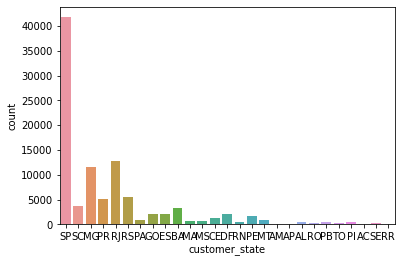

In [12]:
print(customer['customer_state'].value_counts())
sns.countplot(x= 'customer_state', data=customer)

In [13]:
customer.isna().any()

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

In [14]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
print("Geolocation")
print("geolocation size:", geolocation.size)
print("Columns: ", geolocation.columns)

#geolocation.describe()

Geolocation
geolocation size: 5000815
Columns:  Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64


<AxesSubplot:xlabel='geolocation_state', ylabel='count'>

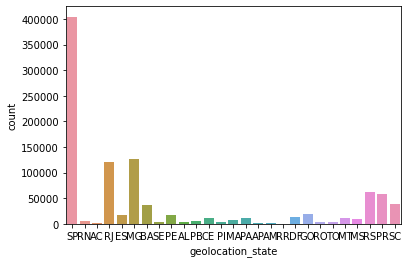

In [18]:
print(geolocation['geolocation_state'].value_counts())
sns.countplot(x= 'geolocation_state', data=geolocation)

In [21]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [22]:
print("Orders: ")
print("Columns: ", orders.columns)
print("Orders Size: ", orders.order_id.size)
orders.describe()

Orders: 
Columns:  Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Orders Size:  99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,c1e204186043302a0a6e1f4d955460fe,64cb0117a687a23b3d4a4982c7dedad3,delivered,2018-06-01 13:39:44,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [23]:
orders.isna().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

In [51]:
orders['order_purchase']=pd.to_datetime(orders['order_purchase_timestamp'])

In [52]:
orders.set_index('order_purchase',inplace=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY
order_purchase,,,,,,,,,,
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10,0
2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,20,1
2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8,2
2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,19,5
2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,21,1
...,...,...,...,...,...,...,...,...,...,...
2017-03-09 09:54:05,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,9,3
2018-02-06 12:58:58,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,12,1
2017-08-27 14:46:43,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,14,6


<AxesSubplot:xlabel='order_purchase'>

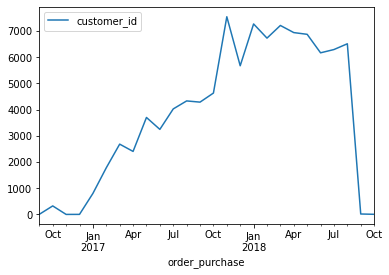

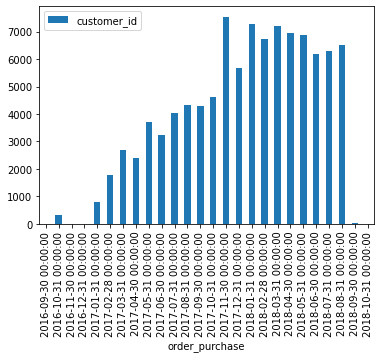

In [53]:
orders.groupby(pd.Grouper(freq='M')).agg({'customer_id':'count'}).plot()
orders.groupby(pd.Grouper(freq='M')).agg({'customer_id':'count'}).plot(kind='bar')

In [35]:
orders['HOUR']=pd.to_datetime(orders['order_purchase_timestamp']).dt.hour

<AxesSubplot:xlabel='HOUR'>

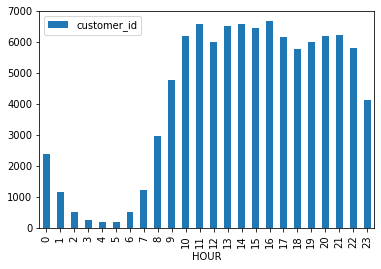

In [48]:
orders.groupby(orders['HOUR']).agg({'customer_id':'count'}).plot(kind='bar') 

In [49]:
'''plt.figure(figsize=(6,4))
sns.distplot(orders['HOUR'])
plt.title('Purchase Hours')
plt.show()'''

"plt.figure(figsize=(6,4))\nsns.distplot(orders['HOUR'])\nplt.title('Purchase Hours')\nplt.show()"

In [41]:
orders['WEEK_DAY']=pd.to_datetime(orders['order_purchase_timestamp']).dt.weekday

<AxesSubplot:xlabel='WEEK_DAY'>

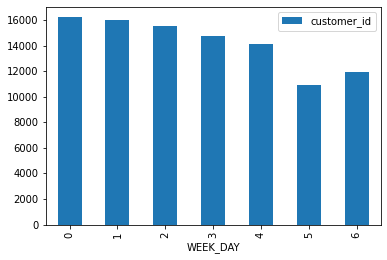

In [47]:
orders.groupby(orders['WEEK_DAY']).agg({'customer_id':'count'}).plot(kind='bar') 

In [68]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


<AxesSubplot:xlabel='order_status'>

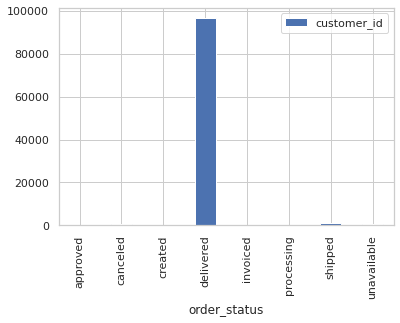

In [73]:
print(orders['order_status'].value_counts())
orders.groupby(orders['order_status']).agg({'customer_id':'count'}).plot(kind='bar') 

In [78]:
efective_orders=orders[(orders.order_status!= 'canceled') & (orders.order_status!= 'unavailable')]

In [79]:
print(efective_orders['order_status'].value_counts())

delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64


In [57]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [67]:
print("Payments: ")
print("Columns: ", order_payments.columns)
print("Payments Size: ", order_payments.order_id.size)
order_payments.describe()

Payments: 
Columns:  Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Payments Size:  103886


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


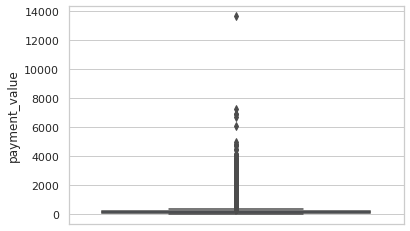

In [63]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=order_payments["payment_value"])

#sns.boxplot(x="day", y="total_bill", data=order_payments)

In [86]:
efective_orders.reset_index(drop=True)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY,order_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10,0,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,20,1,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8,2,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,19,5,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,21,1,2018-02-13 21:18:39
...,...,...,...,...,...,...,...,...,...,...,...
98202,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,9,3,2017-03-09 09:54:05
98203,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,12,1,2018-02-06 12:58:58
98204,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,14,6,2017-08-27 14:46:43
98205,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,21,0,2018-01-08 21:28:27


In [88]:
efective_orders.set_index('order_id')

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY,order_purchase
order_id,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10,0,2017-10-02 10:56:33
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,20,1,2018-07-24 20:41:37
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8,2,2018-08-08 08:38:49
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,19,5,2017-11-18 19:28:06
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,21,1,2018-02-13 21:18:39
...,...,...,...,...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,9,3,2017-03-09 09:54:05
63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,12,1,2018-02-06 12:58:58
83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,14,6,2017-08-27 14:46:43


In [89]:
order_payments.set_index('order_id')

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...
0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [93]:
#payment_orders= pd.concat([order_payments,efective_orders], axis=1)
payment_orders=pd.merge(order_payments, efective_orders)

In [94]:
payment_orders.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY,order_purchase
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,22,2,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,11,1,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,11,1,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,12,2,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,13,0,2018-05-21 13:59:17


<AxesSubplot:xlabel='WEEK_DAY', ylabel='payment_value'>

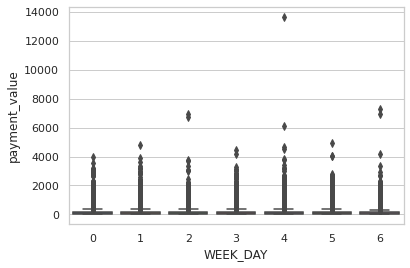

In [97]:
sns.boxplot(x=payment_orders['WEEK_DAY'], y=payment_orders["payment_value"])

In [58]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [55]:
print("Products: ")
print("Columns: ", products.columns)
print("Products Size: ", products.product_id.size)
products.describe()

Products: 
Columns:  Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Products Size:  32951


,product_name_lenght,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [64]:
products.groupby('product_category_name').size().sort_values(ascending=False).head(20)

product_category_name
cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
fashion_bolsas_e_acessorios           849
papelaria                             849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
eletronicos                           517
construcao_ferramentas_construcao     400
eletrodomesticos                      370
dtype: int64

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64


<AxesSubplot:xlabel='count', ylabel='product_category_name'>

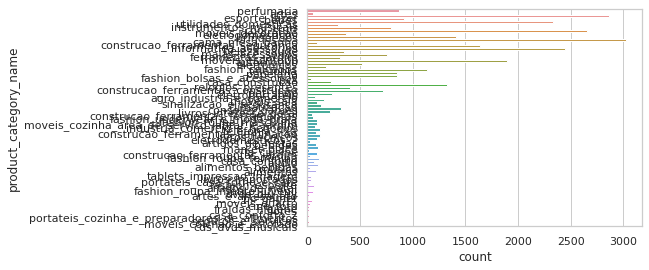

In [113]:
print(products['product_category_name'].value_counts())
sns.countplot(y= 'product_category_name', data=products)